# Chirplets

In [3]:
from utilities.std_imports import *
from scipy.signal import chirp, spectrogram
sys.path.append('D:/source/repos/ds_apps/libs')
import fastchirplet.chirplet as ch
import librosa
plt.rcParams["figure.figsize"] = (22,12)

### Chirps

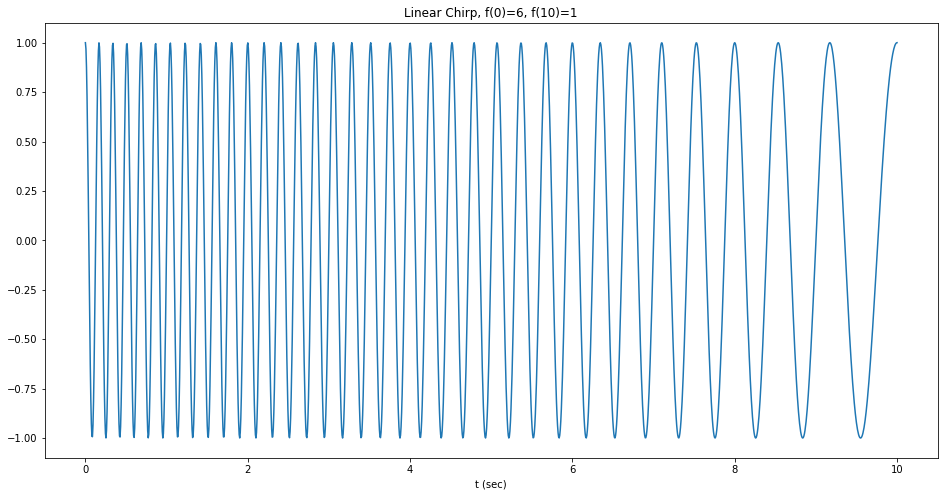

In [5]:
t = np.linspace(0, 10, 1500)
w = chirp(t, f0=6, f1=1, t1=10, method='linear')
plt.figure(figsize=[16,8])
plt.plot(t, w)
plt.title("Linear Chirp, f(0)=6, f(10)=1")
plt.xlabel('t (sec)');

### Spectrograms on Chirps

In [12]:
def plot_spectrogram(title, w, fs):
    ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=256, nfft=576)
    plt.figure(figsize=[14,6])
    plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='gray_r', shading='gouraud')
    plt.title(title)
    plt.xlabel('t (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.grid()

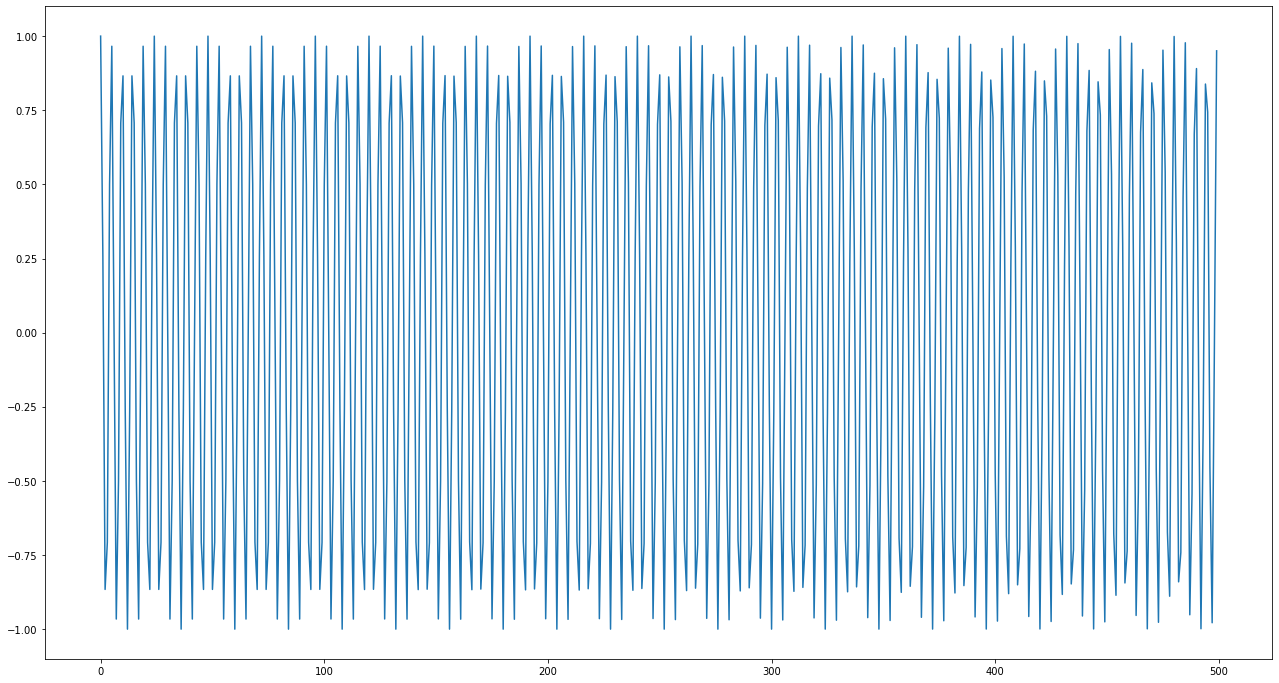

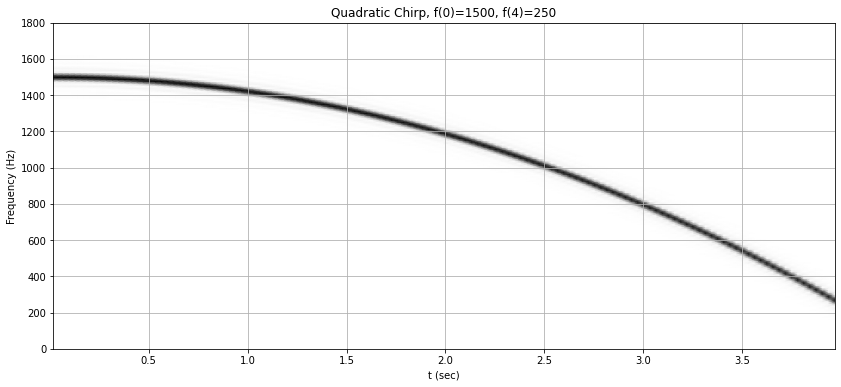

In [16]:
fs = 7200
T = 4
t = np.arange(0, int(T*fs)) / fs
w = chirp(t, f0=1500, f1=250, t1=T, method='quadratic')
plt.plot(w[:500])
plt.show()
plot_spectrogram(f'Quadratic Chirp, f(0)=1500, f({T})=250', w, fs)
plt.show()

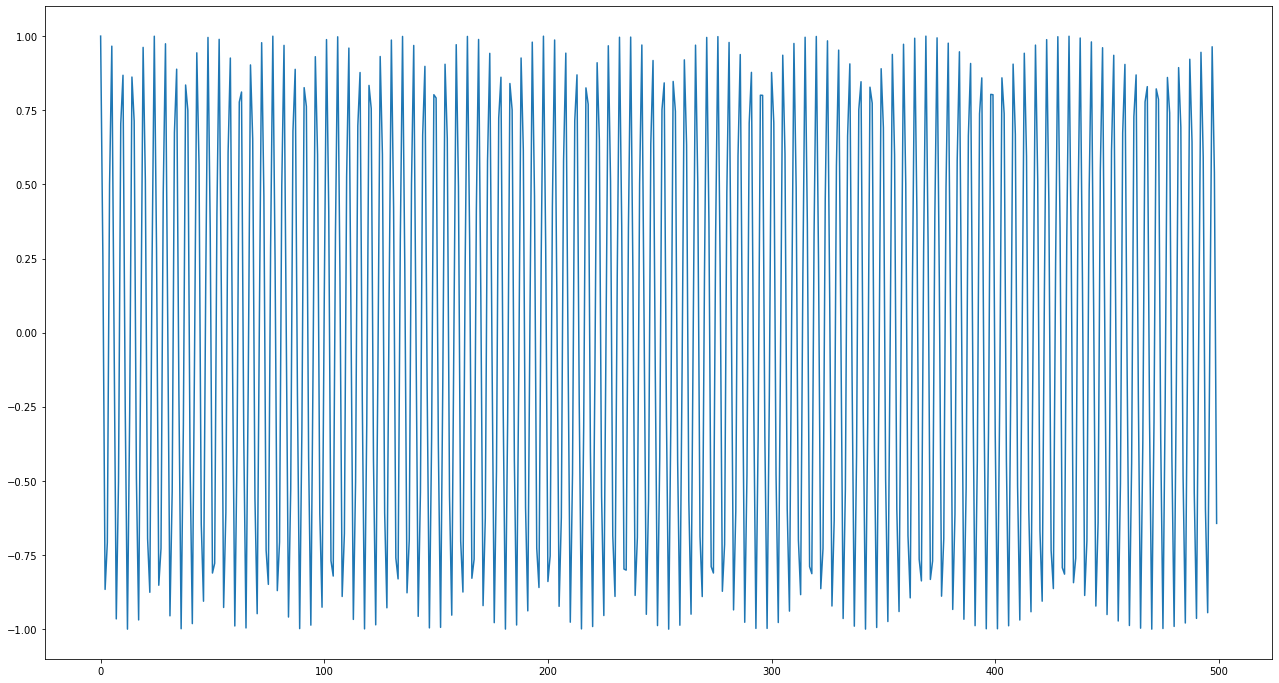

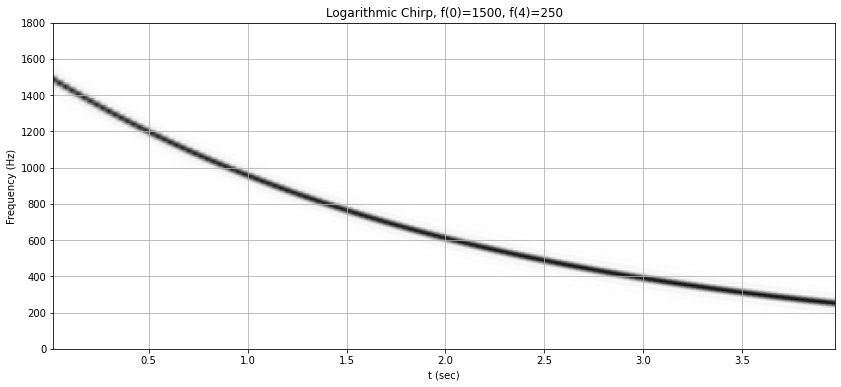

In [17]:
w = chirp(t, f0=1500, f1=250, t1=T, method='logarithmic')
plt.plot(w[:500])
plot_spectrogram(f'Logarithmic Chirp, f(0)=1500, f({T})=250', w, fs)
plt.show()

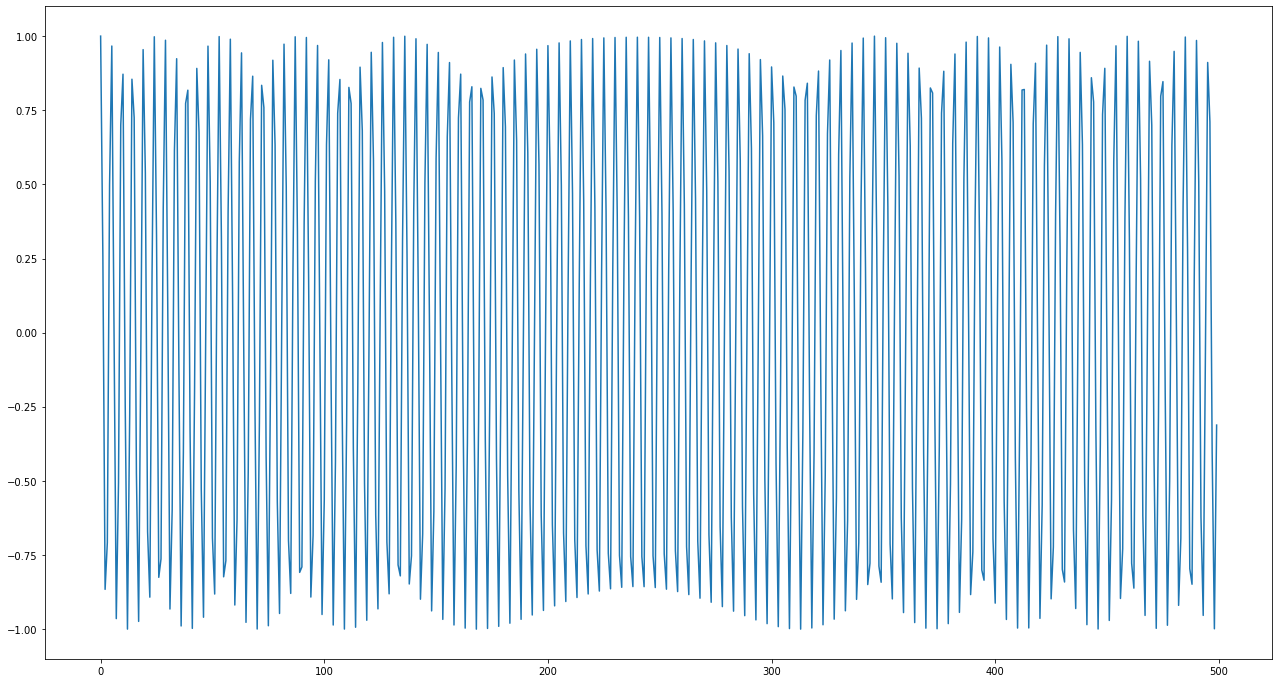

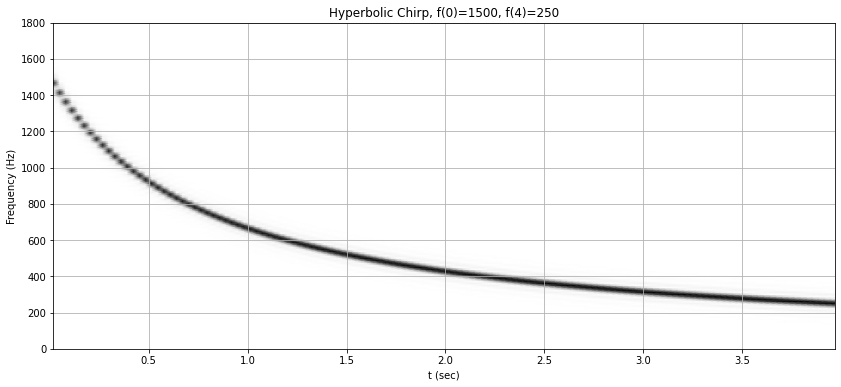

In [18]:
w = chirp(t, f0=1500, f1=250, t1=T, method='hyperbolic')
plt.plot(w[:500])
plot_spectrogram(f'Hyperbolic Chirp, f(0)=1500, f({T})=250', w, fs)
plt.show()

### Load audio data

In [16]:
audio, sr = librosa.load('D:/source/repos/ds_apps/libs/fastchirplet/audio/sa2.wav')

### Calculation

In [17]:
chirps = ch.FCT()
fct = chirps.compute(audio)
fct

array([[0.00414599, 0.00559523, 0.00637473, ..., 0.0209225 , 0.01900102,
        0.01610485],
       [0.00680767, 0.00953233, 0.01121797, ..., 0.03607256, 0.03394054,
        0.02987714],
       [0.00797217, 0.01152868, 0.01395504, ..., 0.04348513, 0.04206394,
        0.03805106],
       ...,
       [0.05132124, 0.08212441, 0.10458809, ..., 0.63012757, 0.57692505,
        0.52544709],
       [0.0623947 , 0.10043241, 0.13062026, ..., 0.68692774, 0.61021656,
        0.51446312],
       [0.06766994, 0.11222294, 0.15794757, ..., 0.51539048, 0.55851205,
        0.51035465]])

### Plots

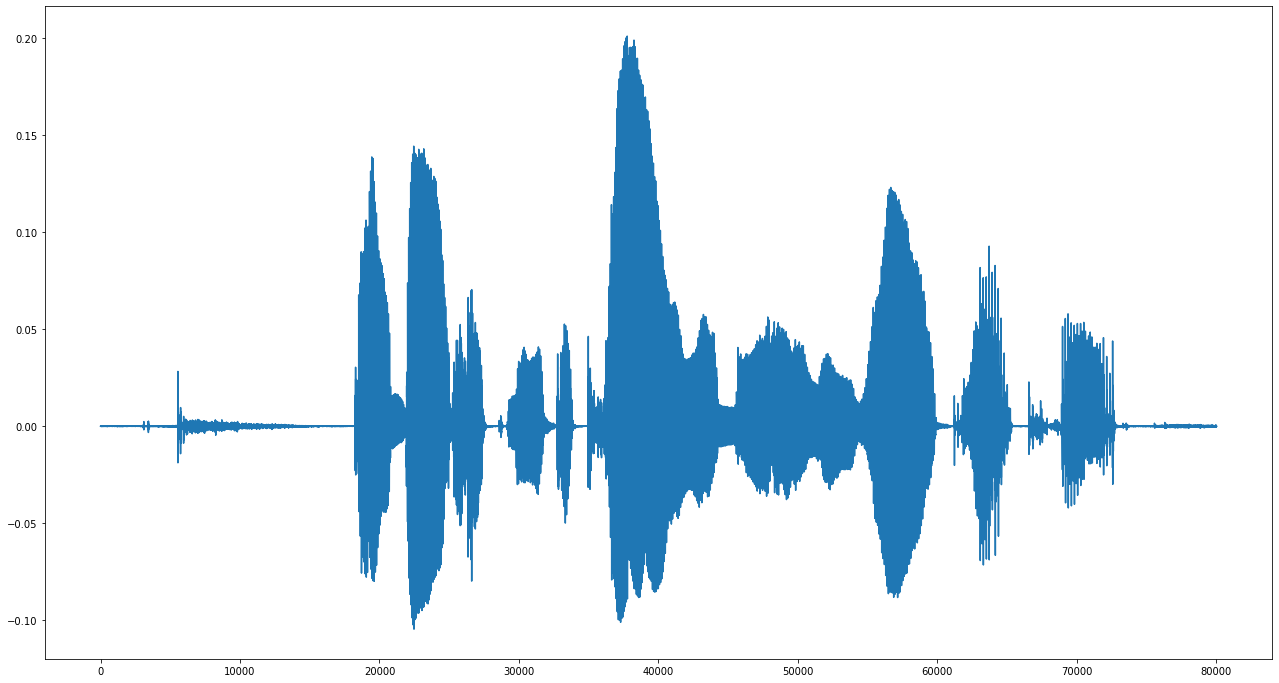

In [23]:
plt.plot(audio);

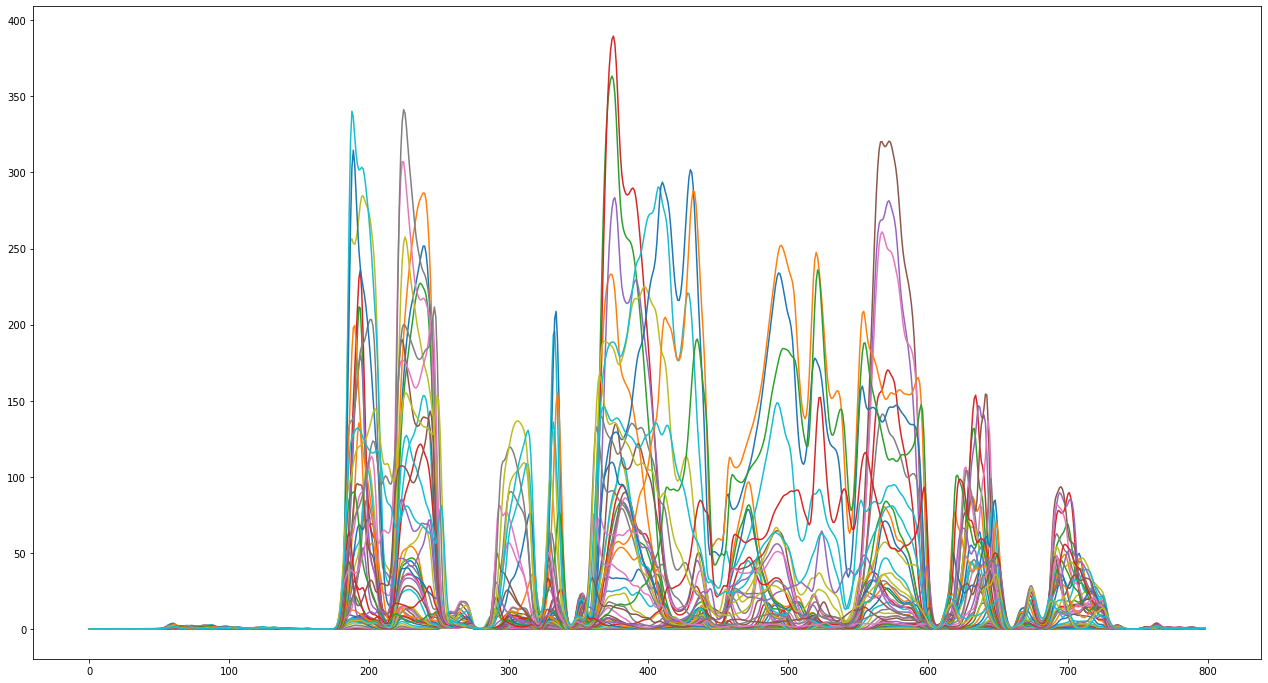

In [25]:
for i in range(len(fct)):
    plt.plot(fct[i]);

### Credits & Links

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html
http://wearcam.org/chirplet.htm
https://github.com/DYNI-TOULON/fastchirplet  
https://arxiv.org/pdf/1611.08749.pdf
https://core.ac.uk/download/pdf/12214635.pdf